 <img src='Imagens/logon.jpg' width="500px" align="center">

## Calculating the errors values among profile 1


In [62]:
################PACOTES###############
import re 
import numpy as np
import pylab as py
import scipy as sp
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Latex
from pandas import Series, DataFrame
#####################################

In [59]:
#Reading data
dado = np.loadtxt('error.pts')
print(dado)

[[   6.705783   44.055186   42.5     ]
 [  28.009516   44.044252   42.6     ]
 [  61.583536   44.01262    42.6     ]
 [  89.36904    43.684989   42.5     ]
 [ 124.164201   43.453826   42.4     ]
 [ 154.863444   43.378039   42.2     ]
 [ 187.941425   43.755101   42.1     ]
 [ 232.122306   44.405067   41.9     ]
 [ 270.123558   44.984559   41.7     ]
 [ 302.079157   45.181367   41.6     ]
 [ 323.282307   44.575738   41.5     ]
 [ 339.174747   44.54529    41.4     ]]


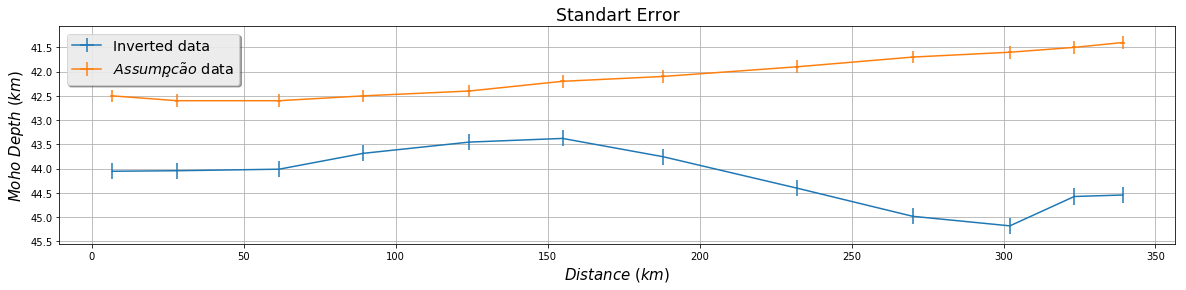

In [73]:
#Plotting data
x=dado[:,0]
y=dado[:,1]
z=dado[:,2]

py.rcParams['figure.figsize'] = (20.0, 4.0)#Redimensiona a figura

fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=0.1, yerr=0.16624715365359402, label='Inverted data')
ax.errorbar(x,z, xerr=0.7, yerr= 0.12958753525292974, label='$Assump\c{c}\~ao$ data')

legend = plt.legend(loc='best', shadow=True, fontsize='x-large')

plt.grid(True)
plt.title('Standart Error', fontsize='xx-large')
plt.xlabel("$Distance$ $(km)$", fontsize=15)
plt.ylabel("$Moho$ $Depth$ $(km)$", fontsize=15)
plt.gca().invert_yaxis() 
plt.savefig('Imagens/Moho.eps')  
plt.show()  
plt.close()
plt.show()

In [70]:
#Calculating Standart error

inv = stats.sem(y)
ass = stats.sem(z)

print('Inverted data =', inv)
print('Assumpcao data =', ass)

('Inverted data =', 0.16624715365359402)
('Assumpcao data =', 0.12958753525292974)


In [115]:
error=[]
i=0.0
for i in range(len(x)):
    error=(y[i]-z[i])**2
    print(error) 
    



2.4186034946
2.0858638395
1.9954952644
1.40419893012
1.11054923828
1.38777588552
2.7393593202
6.27536067449
10.7883278245
12.8261895887
9.46016424464
9.8928491841


In [121]:
dataset = pd.read_csv('errorheader.txt')
dataset.head()
#dataset.describe()

EmptyDataError: No columns to parse from file